# Chapter 4: Mikkel Werling

In [1]:
import numpy as np 
from scipy import stats
import pymc3 as pm
import arviz as az
import theano
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## What's Log Got To Do With It?

Text(0, 0.5, 'logistic(z)')

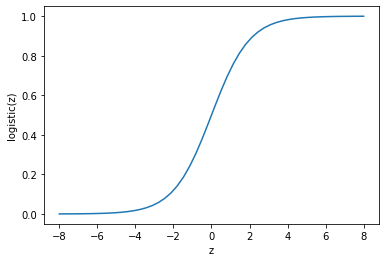

In [3]:
z = np.linspace(-8, 8)
plt.plot(z, 1 / (1 + np.exp(-z)))
plt.xlabel('z')
plt.ylabel('logistic(z)')

## Detecting the class of classic flowers

In [4]:
iris = pd.read_csv('../data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

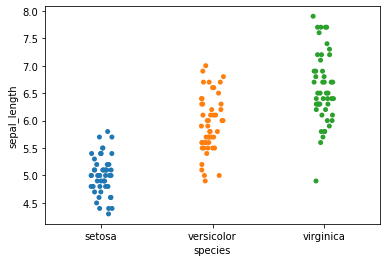

In [5]:
sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True)

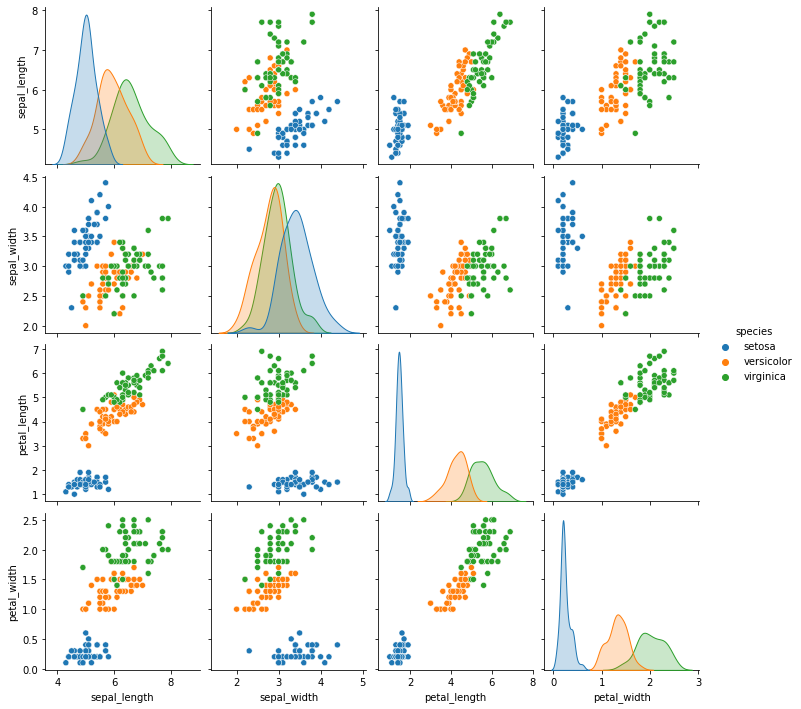

In [6]:
sns.pairplot(iris, hue='species', diag_kind='kde')

Just to be clear, that is a ONE LINER in seaborn?! :O CRAZY

In [7]:
df = iris.query("species == ('setosa', 'versicolor')") #WHAT A FUNCTION!
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values
x_c = x_0 - x_0.mean()

In [8]:
with pm.Model() as model_0:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + pm.math.dot(x_c, β)
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    yl = pm.Bernoulli('yl', p=θ, observed=y_0)
    trace_0 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
The acceptance probability does not match the target. It is 0.8840709121282995, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,0.306,0.342,-0.279,0.994,0.007,0.005,2689.0,2318.0,2688.0,2686.0,1.0
β,5.414,1.062,3.554,7.456,0.021,0.016,2442.0,2176.0,2725.0,2129.0,1.0
θ[0],0.163,0.059,0.059,0.274,0.001,0.001,3527.0,3527.0,3240.0,2132.0,1.0
θ[1],0.067,0.036,0.011,0.137,0.001,0.000,3692.0,3653.0,3317.0,1960.0,1.0
θ[2],0.027,0.020,0.001,0.063,0.000,0.000,3684.0,3611.0,3242.0,1970.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
θ[96],0.815,0.066,0.690,0.930,0.001,0.001,2615.0,2610.0,2588.0,2197.0,1.0
θ[97],0.980,0.017,0.950,1.000,0.000,0.000,2901.0,2892.0,2642.0,1969.0,1.0
θ[98],0.163,0.059,0.059,0.274,0.001,0.001,3527.0,3527.0,3240.0,2132.0,1.0
θ[99],0.815,0.066,0.690,0.930,0.001,0.001,2615.0,2610.0,2588.0,2197.0,1.0


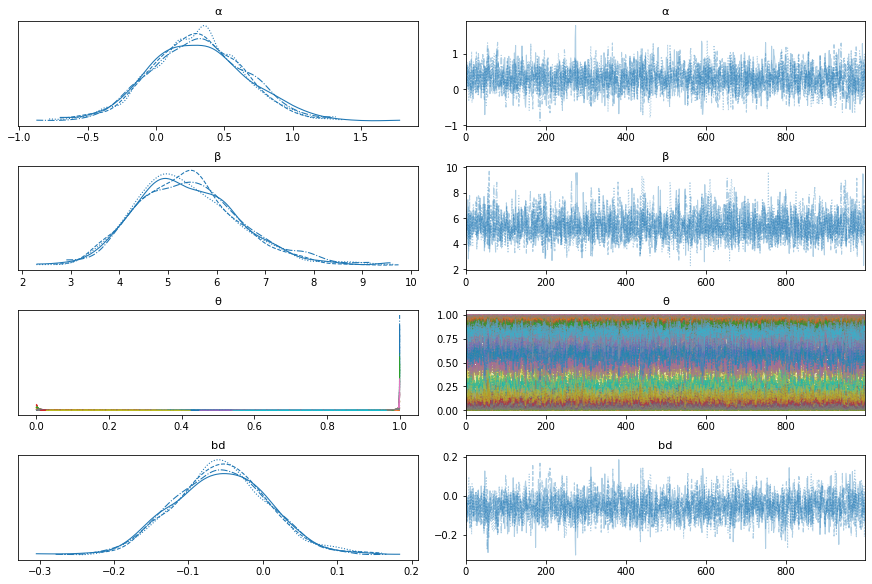

In [9]:
az.plot_trace(trace_0)
az.summary(trace_0)

C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(


([<matplotlib.axis.XTick at 0x1fbf7c93e80>,
 [Text(-1.5, 0, '4.0'),
  Text(-1.0, 0, '4.5'),
  Text(-0.5, 0, '5.0'),
  Text(0.0, 0, '5.5'),
  Text(0.5, 0, '6.0'),
  Text(1.0, 0, '6.5'),
  Text(1.5, 0, '7.0'),
  Text(2.0, 0, '7.5')])

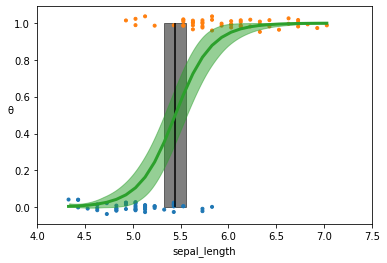

In [10]:
theta = trace_0['θ'].mean(axis=0)
idx = np.argsort(x_c)
plt.plot(x_c[idx], theta[idx], color='C2', lw=3)
plt.vlines(trace_0['bd'].mean(), 0, 1, color='k')
bd_hpd = az.hpd(trace_0['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='k', alpha=0.5)
plt.scatter(x_c, np.random.normal(y_0, 0.02), marker='.', color=[f'C{x}' for x in y_0])
az.plot_hpd(x_c, trace_0['θ'], color='C2')
plt.xlabel(x_n)
plt.ylabel('θ', rotation=0)
# use original scale for xticks
locs, _ = plt.xticks()
plt.xticks(locs, np.round(locs + x_0.mean(), 1))

In [11]:
df = iris.query("species == ('setosa', 'versicolor')")
y_1 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_1 = df[x_n].values

In [12]:
with pm.Model() as model_1:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n))
    μ = α + pm.math.dot(x_1, β)
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1[:,0])
    yl = pm.Bernoulli('yl', p=θ, observed=y_1)
    trace_1 = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 58 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


Text(0, 0.5, 'sepal_width')

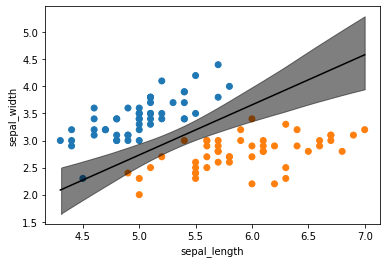

In [13]:
idx = np.argsort(x_1[:,0])
bd = trace_1['bd'].mean(0)[idx]
plt.scatter(x_1[:,0], x_1[:,1], c=[f'C{x}' for x in y_0])
plt.plot(x_1[:,0][idx], bd, color='k');
az.plot_hpd(x_1[:,0], trace_1['bd'], color='k')
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

## Logging off with Log Odds

Log odds are actually not completely fucked. They are basically just:

$$\frac{p(success)}{1 - p(success)}$$

For instance, the odds of getting a six with a normal die is:

$$ \frac{\frac{1}{6}}{\frac{5}{6}}$$

<ipython-input-14-4e639ecc9e98>:2: RuntimeWarning: divide by zero encountered in true_divide
  odds = probability / (1 - probability)


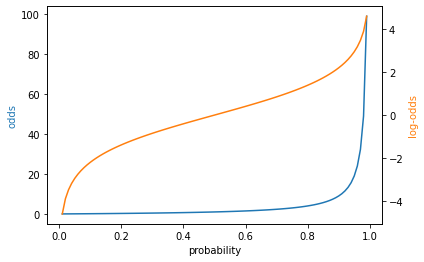

In [14]:
probability = np.linspace(0.01, 1, 100)
odds = probability / (1 - probability)
_, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(probability, odds, 'C0')
ax2.plot(probability, np.log(odds), 'C1')
ax1.set_xlabel('probability')
ax1.set_ylabel('odds', color='C0')
ax2.set_ylabel('log-odds', color='C1')
ax1.grid(False)
ax2.grid(False)

# Correlations in Python

<AxesSubplot:>

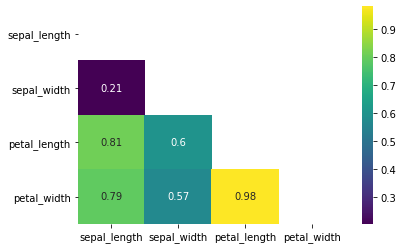

In [15]:
corr = iris[iris['species'] != 'virginica'].corr()
mask = np.tri(*corr.shape).T
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis')

# Logistic Regression needs Logical Choices

In [16]:
df = iris.query("species == ('setosa', 'versicolor')")
df = df[45:]
y_3 = pd.Categorical(df['species']).codes
x_n = ['sepal_length', 'sepal_width']
x_3 = df[x_n].values

In [17]:
with pm.Model() as model_3:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=2, shape=len(x_n))
    μ = α + pm.math.dot(x_3, β)
    θ = 1 / (1 + pm.math.exp(-μ))
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_3[:,0])
    yl = pm.Bernoulli('yl', p=θ, observed=y_3)
    trace_3 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 54 seconds.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


Text(0, 0.5, 'sepal_width')

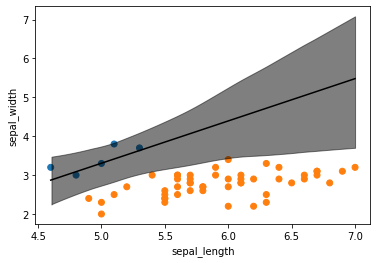

In [18]:
idx = np.argsort(x_3[:,0])
bd = trace_3['bd'].mean(0)[idx]
plt.scatter(x_3[:,0], x_3[:,1], c= [f'C{x}' for x in y_3])
plt.plot(x_3[:,0][idx], bd, color='k')
az.plot_hpd(x_3[:,0], trace_3['bd'], color='k')
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

## Maxing out with softmax

In [19]:
import theano.tensor as tt

In [20]:
iris = sns.load_dataset('iris')
y_s = pd.Categorical(iris['species']).codes
x_n = iris.columns[:-1]
x_s = iris[x_n].values
x_s = (x_s - x_s.mean(axis=0)) / x_s.std(axis=0)

In [21]:
with pm.Model() as model_s:
    α = pm.Normal('α', mu=0, sd=5, shape=3) #three classes
    β = pm.Normal('β', mu=0, sd=5, shape=(4,3)) #four features, three classes
    μ = pm.Deterministic('μ', α + pm.math.dot(x_s, β))
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    trace_s = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 102 seconds.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 14 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α[0],-1.020,3.695,-8.060,5.884,0.068,0.048,2937.0,2937.0,2949.0,3530.0,1.0
α[1],5.927,3.193,-0.079,11.667,0.059,0.042,2897.0,2897.0,2903.0,3832.0,1.0
α[2],-4.722,3.357,-11.057,1.417,0.061,0.043,3042.0,3042.0,3026.0,2906.0,1.0
"β[0,0]",-2.528,4.106,-10.543,4.877,0.069,0.051,3582.0,3260.0,3585.0,3702.0,1.0
"β[0,1]",1.980,3.309,-4.004,8.352,0.070,0.049,2253.0,2253.0,2251.0,2974.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
"μ[148,1]",3.118,6.938,-9.828,15.979,0.129,0.091,2896.0,2878.0,2906.0,3841.0,1.0
"μ[148,2]",10.643,7.032,-2.788,23.470,0.128,0.091,3018.0,3001.0,3030.0,3674.0,1.0
"μ[149,0]",-11.075,5.567,-21.519,-0.808,0.102,0.073,2957.0,2949.0,2978.0,3774.0,1.0
"μ[149,1]",4.246,4.681,-4.222,13.335,0.087,0.062,2901.0,2819.0,2902.0,3533.0,1.0


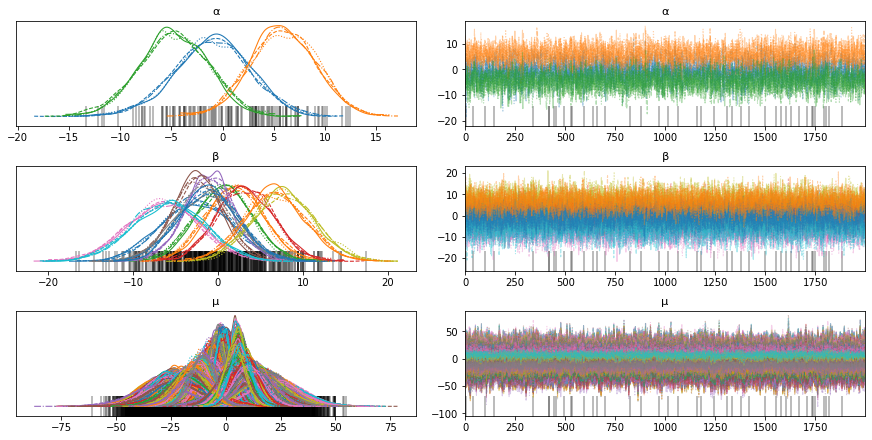

In [22]:
az.plot_trace(trace_s)
az.summary(trace_s)

In [23]:
data_pred = trace_s['μ'].mean(0)
y_pred = [np.exp(point)/np.sum(np.exp(point), axis=0)
for point in data_pred]
f'{np.sum(y_s == np.argmax(y_pred, axis=1)) / len(y_s):.2f}'

'0.98'

The code above have the computational problem that it has too many parameters. This is true, as the softmax must sum to one by definition, so by having $i-1$, we know what $i$ must be. This makes convergence hard. Here is code for just adding a stupid zero afterwards, which makes things great again.

In [24]:
with pm.Model() as model_sf:
    α = pm.Normal('α', mu=0, sd=2, shape=2) # SHOCKING - only 2, leaving room for the last group
    β = pm.Normal('β', mu=0, sd=2, shape=(4,2)) #leaving room for the last group
    α_f = tt.concatenate([[0] ,α])
    β_f = tt.concatenate([np.zeros((4,1)) , β], axis=1)
    μ = α_f + pm.math.dot(x_s, β_f)
    θ = tt.nnet.softmax(μ)
    yl = pm.Categorical('yl', p=θ, observed=y_s)
    trace_sf = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 86 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α[0],2.627,0.824,1.116,4.189,0.019,0.014,1944.0,1773.0,2047.0,1831.0,1.00
α[1],-2.403,1.124,-4.380,-0.056,0.025,0.017,2097.0,2097.0,2104.0,1682.0,1.00
"β[0,0]",2.091,1.142,-0.019,4.285,0.028,0.020,1617.0,1617.0,1614.0,2090.0,1.00
"β[0,1]",1.614,1.172,-0.565,3.821,0.029,0.021,1619.0,1619.0,1612.0,1992.0,1.00
"β[1,0]",-1.865,0.727,-3.132,-0.449,0.018,0.013,1576.0,1576.0,1579.0,2190.0,1.00
"β[1,1]",-2.353,0.854,-3.867,-0.697,0.021,0.015,1618.0,1618.0,1614.0,1889.0,1.01
"β[2,0]",1.772,1.284,-0.601,4.201,0.030,0.022,1854.0,1780.0,1856.0,2386.0,1.00
"β[2,1]",5.530,1.448,2.786,8.138,0.030,0.022,2256.0,2203.0,2256.0,2527.0,1.00
"β[3,0]",1.141,1.227,-1.047,3.532,0.029,0.021,1780.0,1752.0,1779.0,1818.0,1.00
"β[3,1]",5.668,1.347,3.053,8.137,0.031,0.022,1894.0,1894.0,1893.0,1655.0,1.00


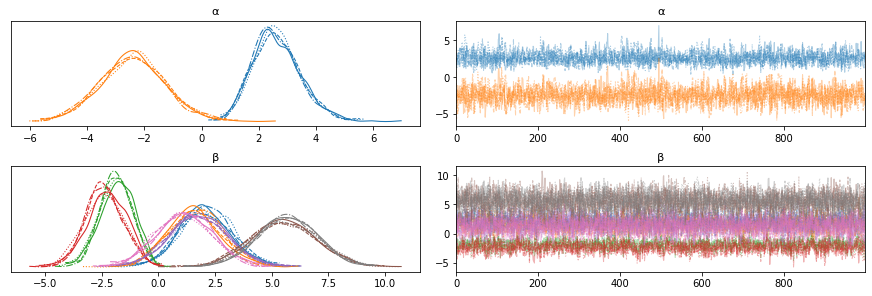

In [25]:
az.plot_trace(trace_sf)
az.summary(trace_sf)

## Generating Generative Models

In [26]:
with pm.Model() as lda:
    μ = pm.Normal('μ', mu=0, sd=10, shape=2)
    σ = pm.HalfNormal('σ', 10)
    setosa = pm.Normal('setosa', mu=μ[0], sd=σ, observed=x_0[:50])
    versicolor = pm.Normal('versicolor', mu=μ[1], sd=σ,
    observed=x_0[50:])
    bd = pm.Deterministic('bd', (μ[0] + μ[1]) / 2)
    trace_lda = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 70 seconds.


C:\Users\Mikkel\anaconda3\envs\cogmod\lib\site-packages\arviz\stats\stats.py:340: UserWarning: hpd will be deprecated Please replace hdi
  warnings.warn(


Text(0.5, 0, 'sepal_length')

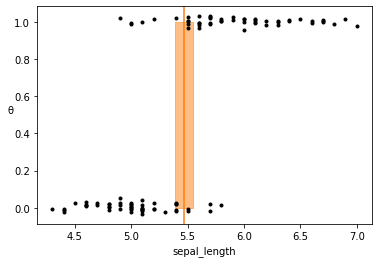

In [27]:
plt.axvline(trace_lda['bd'].mean(), ymax=1, color='C1')
bd_hpd = az.hpd(trace_lda['bd'])
plt.fill_betweenx([0, 1], bd_hpd[0], bd_hpd[1], color='C1', alpha=0.5)
plt.plot(x_0, np.random.normal(y_0, 0.02), '.', color='k')
plt.ylabel('θ', rotation=0)
plt.xlabel('sepal_length')

In [28]:
az.summary(trace_lda)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
μ[0],5.005,0.065,4.891,5.130,0.001,0.001,4310.0,4300.0,4324.0,2780.0,1.0
μ[1],5.937,0.063,5.822,6.053,0.001,0.001,4899.0,4890.0,4896.0,2843.0,1.0
σ,0.448,0.033,0.385,0.508,0.000,0.000,5294.0,5190.0,5371.0,2923.0,1.0
bd,5.471,0.043,5.384,5.549,0.001,0.000,4714.0,4713.0,4730.0,2917.0,1.0


## I've Got Poisson in My Veins

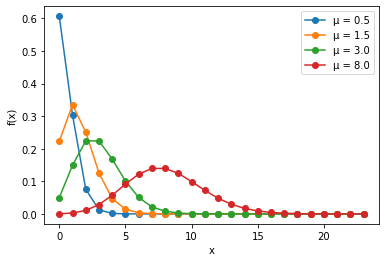

In [29]:
mu_params = [0.5, 1.5, 3, 8]
x = np.arange(0, max(mu_params) * 3)
for mu in mu_params:
    y = stats.poisson(mu).pmf(x)
    plt.plot(x, y, 'o-', label=f'μ = {mu:3.1f}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')

In [31]:
n = 100
θ_real = 2.5
ψ = 0.1
# Simulate some data
counts = np.array([(np.random.random() > (1-ψ)) * np.random.poisson(θ_real) for i in range(n)])

In [32]:
with pm.Model() as ZIP:
    ψ = pm.Beta('ψ', 1, 1)
    θ = pm.Gamma('θ', 2, 0.1)
    y = pm.ZeroInflatedPoisson('y', ψ, θ, observed=counts) #It comes with this as a function, jesus
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ, ψ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.


In [34]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
ψ,0.186,0.039,0.117,0.261,0.001,0.000,3555.0,3552.0,3524.0,2959.0,1.0
θ,3.054,0.450,2.243,3.906,0.008,0.005,3509.0,3461.0,3464.0,2556.0,1.0


## Fishing for fish-data

In [35]:
fish_data = pd.read_csv('../data/fish.csv')

In [36]:
with pm.Model() as ZIP_reg:
    ψ = pm.Beta('ψ', 1, 1)
    α = pm.Normal('α', 0, 10)
    β = pm.Normal('β', 0, 10, shape=2)
    θ = pm.math.exp(α + β[0] * fish_data['child'] + β[1] * fish_data['camper'])
    yl = pm.ZeroInflatedPoisson('yl', ψ, θ, observed=fish_data['count'])
    trace_ZIP_reg = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [β, α, ψ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 113 seconds.


In [38]:
az.summary(trace_ZIP_reg)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
α,1.613,0.088,1.450,1.773,0.002,0.001,2046.0,2046.0,2095.0,1814.0,1.0
β[0],-0.930,0.094,-1.105,-0.754,0.002,0.001,3456.0,3447.0,3450.0,2355.0,1.0
β[1],0.806,0.097,0.620,0.980,0.002,0.002,1962.0,1894.0,1993.0,1822.0,1.0
ψ,0.486,0.035,0.421,0.554,0.001,0.000,3124.0,3101.0,3129.0,2498.0,1.0


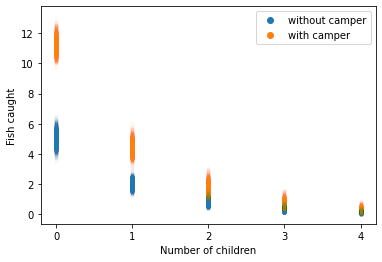

In [39]:
children = [0, 1, 2, 3, 4]
fish_count_pred_0 = []
fish_count_pred_1 = []
for n in children:
    without_camper = trace_ZIP_reg['α'] + trace_ZIP_reg['β'][:,0] * n
    with_camper = without_camper + trace_ZIP_reg['β'][:,1]
    fish_count_pred_0.append(np.exp(without_camper))
    fish_count_pred_1.append(np.exp(with_camper))
plt.plot(children, fish_count_pred_0, 'C0.', alpha=0.01)
plt.plot(children, fish_count_pred_1, 'C1.', alpha=0.01)
plt.xticks(children);
plt.xlabel('Number of children')
plt.ylabel('Fish caught')
plt.plot([], 'C0o', label='without camper')
plt.plot([], 'C1o', label='with camper')
plt.legend()

## Robust Logistic Regression

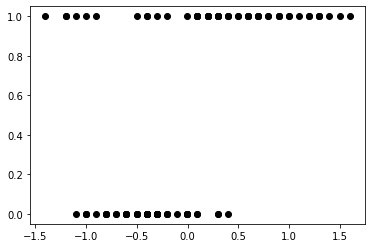

In [40]:
iris = sns.load_dataset("iris")
df = iris.query("species == ('setosa', 'versicolor')")
y_0 = pd.Categorical(df['species']).codes
x_n = 'sepal_length'
x_0 = df[x_n].values
y_0 = np.concatenate((y_0, np.ones(6, dtype=int)))
x_0 = np.concatenate((x_0, [4.2, 4.5, 4.0, 4.3, 4.2, 4.4]))
x_c = x_0 - x_0.mean()
plt.plot(x_c, y_0, 'o', color='k');

We include a $\pi$-parameter:

In [41]:
with pm.Model() as model_rlg:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10)
    μ = α + x_c * β
    θ = pm.Deterministic('θ', pm.math.sigmoid(μ))
    bd = pm.Deterministic('bd', -α/β)
    π = pm.Beta('π', 1., 1.)
    p = π * 0.5 + (1 - π) * θ
    yl = pm.Bernoulli('yl', p=p, observed=y_0)
    trace_rlg = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [π, β, α]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 73 seconds.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
There were 11 divergences after tuning. Increase `target_accept` or reparameterize.


## Generally, we want General Linear Models (GLM)

In [ ]:
with pm.Model() as model:
    glm.glm('y ~ x', data)
    trace = sample(2000)

Default for linear regression here is uniform for the intercept and a zero-centered normal distribution with completely fucked standard deviations. 